In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [648]:
movies_data = pd.read_csv('movies_metadata.csv', low_memory=False)

In [649]:
movies_data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [650]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [651]:
movies_data.duplicated().sum()

17

In [652]:
movies_data = movies_data.drop_duplicates()
movies_data.duplicated().sum()

0

In [653]:
movies_data.isnull().sum()

adult                        0
belongs_to_collection    40956
budget                       0
genres                       0
homepage                 37669
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25042
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [654]:
movies_data.isna().sum()

adult                        0
belongs_to_collection    40956
budget                       0
genres                       0
homepage                 37669
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25042
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [655]:
movies_data['budget'] = pd.to_numeric(movies_data['budget'], errors='coerce')
movies_data['popularity'] = pd.to_numeric(movies_data['popularity'], errors='coerce')
movies_data['vote_average'] = pd.to_numeric(movies_data['vote_average'], errors='coerce')
movies_data['revenue'] = pd.to_numeric(movies_data['revenue'], errors='coerce')

C:\Users\efeba\AppData\Local\Temp\ipykernel_22140\1548991111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['budget'] = pd.to_numeric(movies_data['budget'], errors='coerce')
C:\Users\efeba\AppData\Local\Temp\ipykernel_22140\1548991111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['popularity'] = pd.to_numeric(movies_data['popularity'], errors='coerce')
C:\Users\efeba\AppData\Local\Temp\ipykernel_22140\1548991111.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [656]:
columns_to_drop = [
    'imdb_id', 'original_language', 'poster_path', 'status', 'runtime', 
    'belongs_to_collection', 'homepage', 'production_companies',
    'production_countries', 'spoken_languages', 'video','tagline'
]
movies_data = movies_data.drop(columns=columns_to_drop, axis=1)

In [657]:
def extract_genres(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        return len(genres_list)
    except:
        return 0

movies_data['num_genres'] = movies_data['genres'].apply(extract_genres)

movies_data['release_date'] = pd.to_datetime(movies_data['release_date'], errors='coerce')
movies_data['release_date'] = movies_data['release_date'].fillna(pd.Timestamp('1900-01-01'))

# Extract the release year
movies_data['release_year'] = movies_data['release_date'].dt.year

movies_data = movies_data[['budget', 'release_year', 'popularity', 'vote_average', 'revenue']]
# Drop rows with missing values in critical columns
movies_data = movies_data.dropna(subset=['budget', 'release_year', 'popularity', 'vote_average', 'revenue'])


In [658]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [659]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(movies_data)
movies_data['cluster'] = kmeans.fit_predict(scaled_features)

In [660]:
silhouette_score(scaled_features, movies_data['cluster'])

0.4237881961992296

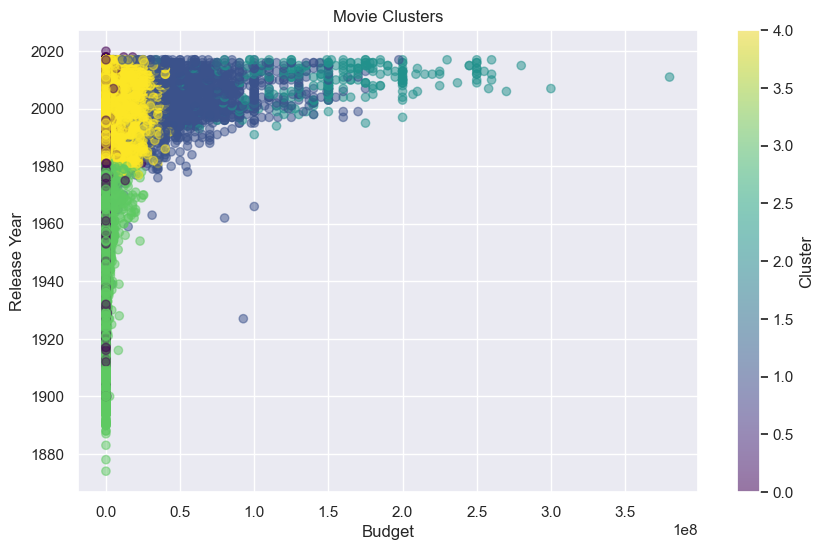

In [661]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_data['budget'], movies_data['release_year'], c=movies_data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Movie Clusters')
plt.xlabel('Budget')
plt.ylabel('Release Year')
plt.colorbar(label='Cluster')
plt.show()

Based on the clustering chart of movie budgets versus release years, we can observe that the budget for movies has significantly increased over time. Most of the high-budget films are from the 21st century, as indicated by the dense clusters in the upper right part of the chart. However, there are a few examples of high-budget films from the 20th century, represented by the purple cluster. This indicates a general trend of increasing budgets, particularly in recent years.

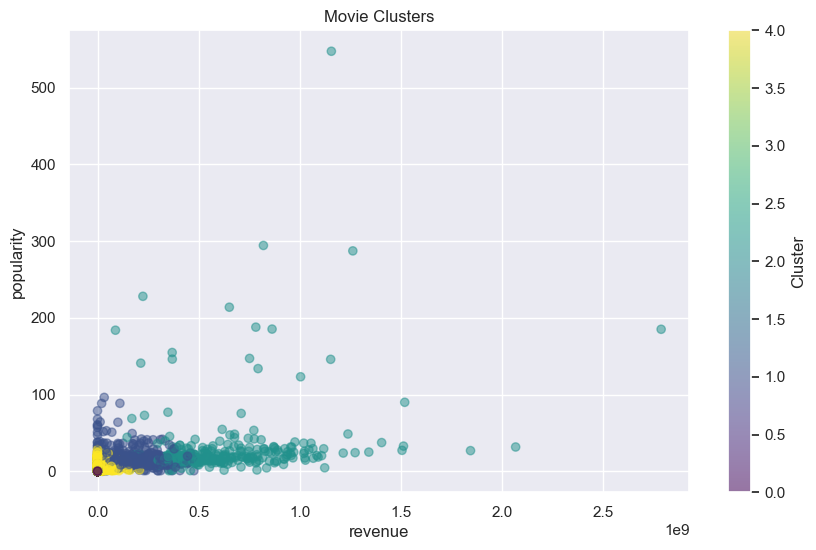

In [662]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_data['revenue'], movies_data['popularity'], c=movies_data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Movie Clusters')
plt.xlabel('revenue')
plt.ylabel('popularity')
plt.colorbar(label='Cluster')
plt.show()

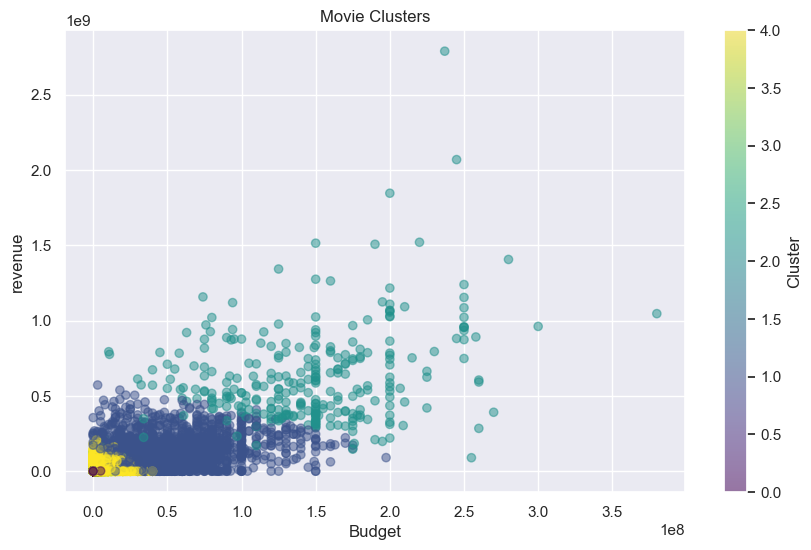

In [663]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_data['budget'], movies_data['revenue'], c=movies_data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Movie Clusters')
plt.xlabel('Budget')
plt.ylabel('revenue')
plt.colorbar(label='Cluster')
plt.show()

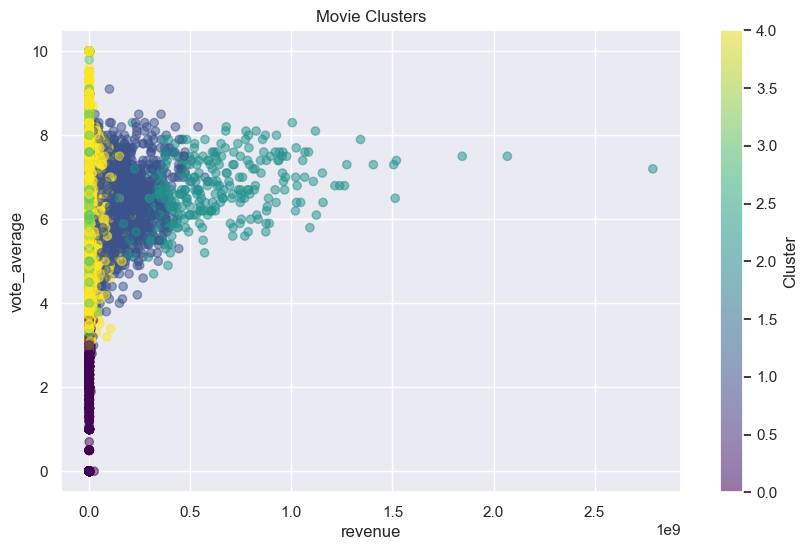

In [664]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_data['revenue'], movies_data['vote_average'], c=movies_data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Movie Clusters')
plt.xlabel('revenue')
plt.ylabel('vote_average')
plt.colorbar(label='Cluster')
plt.show()

The clustering chart of movie revenues versus average votes shows that there is no clear relationship between revenue and voting. We cannot conclude that higher ratings correlate with higher revenues, as the data points are widely dispersed and do not exhibit a distinct pattern linking higher vote averages with increased revenue.

In [665]:
wcss = []

for i in range(1,7) :
    kmeans = KMeans(i)
    kmeans.fit(scaled_features)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

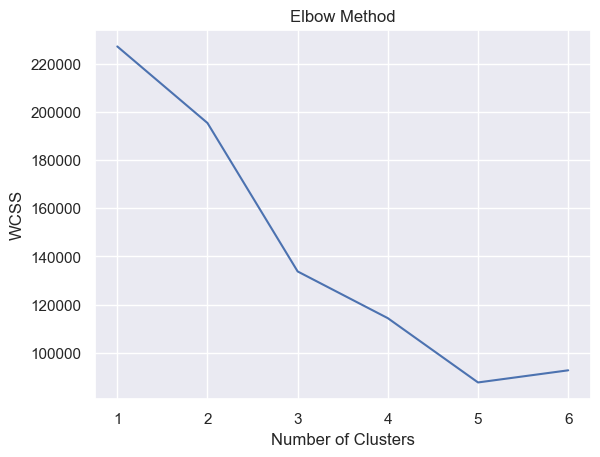

In [666]:
cluster_number = range(1,7)
plt.plot(cluster_number, wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [667]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45443 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45443 non-null  float64
 1   release_year  45443 non-null  int32  
 2   popularity    45443 non-null  float64
 3   vote_average  45443 non-null  float64
 4   revenue       45443 non-null  float64
 5   cluster       45443 non-null  int32  
dtypes: float64(4), int32(2)
memory usage: 2.1 MB


In [668]:
movies_data.isna().sum()

budget          0
release_year    0
popularity      0
vote_average    0
revenue         0
cluster         0
dtype: int64

In [669]:
movies_data

,budget,release_year,popularity,vote_average,revenue,cluster
0,30000000.0,1995,21.946943,7.7,373554033.0,1
1,65000000.0,1995,17.015539,6.9,262797249.0,1
2,0.0,1995,11.712900,6.5,0.0,4
3,16000000.0,1995,3.859495,6.1,81452156.0,4
4,0.0,1995,8.387519,5.7,76578911.0,4
...,...,...,...,...,...,...
45461,0.0,1900,0.072051,4.0,0.0,3
45462,0.0,2011,0.178241,9.0,0.0,4
45463,0.0,2003,0.903007,3.8,0.0,4
45464,0.0,1917,0.003503,0.0,0.0,0
